In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt

Filling in the missing values with the mean of the corresponding feature
Performing Ordinal Encoding on non-integer features (Sex, Area Type)

In [ ]:
# Create the dataframe for the dataset
df = pd.read_csv('CBC_data.csv')
# Calculating the mean of every column (feature)
rbc_mean = df['RBC'].mean()
hgb_mean = df['HGB'].mean()
wbc_mean = df['WBC'].mean()
eos_cnt_mean = df['EOS.CNT'].mean()
mono_cnt_mean = df['MONO.CNT'].mean()
nut_cnt_mean = df['NUT.CNT'].mean()
pl_cnt_mean = df['PL.CNT'].mean()
lymp_cnt_mean = df['LYMP.CNT'].mean()
# Filling the all the missing values 
df['RBC'].fillna(rbc_mean, inplace=True)
df['HGB'].fillna(hgb_mean, inplace=True)
df['WBC'].fillna(wbc_mean, inplace=True)
df['EOS.CNT'].fillna(eos_cnt_mean, inplace=True)
df['MONO.CNT'].fillna(mono_cnt_mean, inplace=True)
df['NUT.CNT'].fillna(nut_cnt_mean, inplace=True)
df['PL.CNT'].fillna(pl_cnt_mean, inplace=True)
df['LYMP.CNT'].fillna(lymp_cnt_mean, inplace=True)
# Converts the dataframe into a numpy array
data = df.to_numpy()
# Converts the features that are not numerical values into integer values
encoder = OrdinalEncoder()
data_to_encode = data[:,[1, 2]]
encoder.fit(data_to_encode)
data[:, [1, 2]] = encoder.transform(data_to_encode)

X_train_data = np.array(data[0])
X_test_data = np.array(data[149])



Adding 150 Negative labeled examples to the training set

Adding 150 Positive labeled examples to the training set

In [ ]:
pos_examples_count, neg_examples_count  = 0, 1
train_idx, test_idx = 0, 0
for i in range(1, len(data)):
    if neg_examples_count == 150:
        break
    elif data[i][6] == "Negative":
        # X_train_data[train_idx] = data[i]
        X_train_data = np.vstack((X_train_data, data[i]))
        neg_examples_count += 1
        train_idx += 1

for i in range(len(data)):
    if pos_examples_count == 150:
        break
    elif data[i][6] == "Positive":
        X_train_data = np.vstack((X_train_data, data[i]))
        # X_train_data[train_idx] = data[i]
        pos_examples_count += 1
        train_idx += 1

Adding 60 Negative labeled examples to the test set.

Adding 60 Positive Labeled examples to the test set

In [ ]:
pos_examples_count, neg_examples_count = 0, 1

for i in range(500, len(data)):
    if neg_examples_count == 60:
        break
    if data[i][6] == "Negative":
        X_test_data = np.vstack((X_test_data, data[i]))
        # X_test_data[test_idx] = data[i]
        neg_examples_count += 1
        test_idx += 1
        
for i in range(1927, len(data)):
    if pos_examples_count == 60:
        break
    if data[i][6] == "Positive":
        X_test_data = np.vstack((X_test_data, data[i]))
        # X_test_data[test_idx] = data[i]
        pos_examples_count += 1
        test_idx += 1

y_train = X_train_data[:, 6:7]
X_train = X_train_data[:, 7:]
X_train = np.hstack((X_train, X_train_data[:, [1, 2]]))
y_test = X_test_data[:, 6:7]
X_test = X_test_data[:, 7:]
X_test = np.hstack((X_test, X_test_data[:, [1, 2]]))



Converting the labels into integer values (Positive = 1 and Negative = 0)

In [ ]:
for i in range(len(y_train)):
    if y_train[i] == "Positive":
        y_train[i] = 1
    elif y_train[i] == "Negative":
        y_train[i] = 0

y_train = y_train.reshape(y_train.shape[0],)
y_train = y_train.astype('int')

for i in range(len(y_test)):
    if y_test[i] == "Positive":
        y_test[i] = 1
    elif y_test[i] == "Negative":
        y_test[i] = 0

y_test = y_test.reshape(y_test.shape[0],)
y_test = y_test.astype('int')

1
(300, 11)
No regularization:
Training accuracy: 0.7366666666666667
Testing accuracy: 0.475
Accuracy: 0.72 (+/- 0.15)
              precision    recall  f1-score   support

           0       0.45      0.23      0.31        60
           1       0.48      0.72      0.58        60

    accuracy                           0.48       120
   macro avg       0.47      0.47      0.44       120
weighted avg       0.47      0.47      0.44       120

2
(300, 66)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No regularization:
Training accuracy: 0.8
Testing accuracy: 0.5833333333333334


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy: 0.62 (+/- 0.07)
3
(300, 286)
No regularization:
Training accuracy: 0.9966666666666667
Testing accuracy: 0.5083333333333333
Accuracy: 0.58 (+/- 0.16)
4
(300, 1001)
No regularization:
Training accuracy: 0.9966666666666667
Testing accuracy: 0.5166666666666667
Accuracy: 0.60 (+/- 0.20)

L1 regularization with C value of 0.01:
Training accuracy: 0.5
Testing accuracy: 0.5
Accuracy: 0.50 (+/- 0.00)

L2 regularization with C value of 0.01:
Training accuracy: 0.66
Testing accuracy: 0.4666666666666667
Accuracy: 0.61 (+/- 0.16)

L1 regularization with C value of 0.1:
Training accuracy: 0.6933333333333334
Testing accuracy: 0.45
Accuracy: 0.67 (+/- 0.14)

L2 regularization with C value of 0.1:
Training accuracy: 0.7166666666666667
Testing accuracy: 0.4583333333333333
Accuracy: 0.67 (+/- 0.13)

L1 regularization with C value of 1:
Training accuracy: 0.7233333333333334
Testing accuracy: 0.43333333333333335
Accuracy: 0.69 (+/- 0.12)

L2 regularization with C value of 1:
Training accuracy: 0.

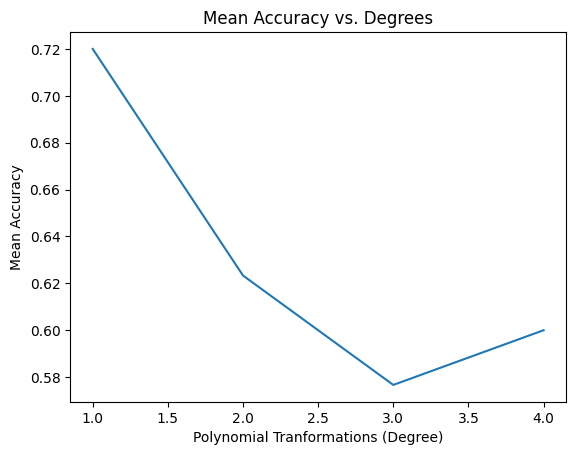

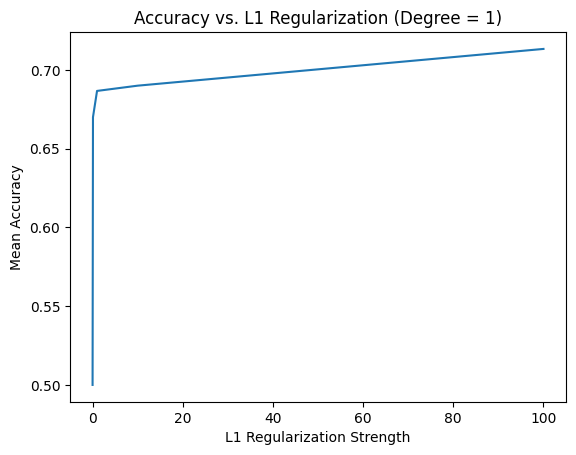

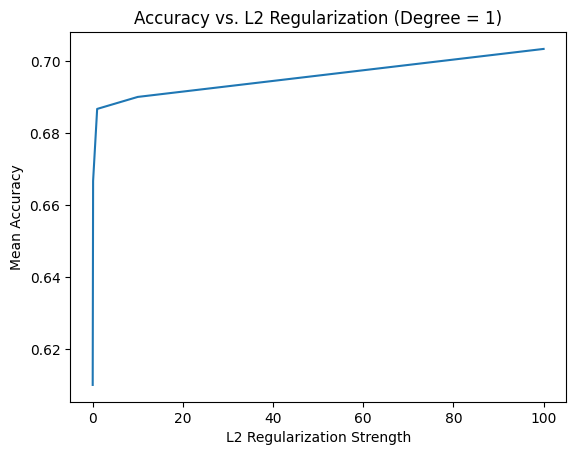


L1 regularization with C value of 0.01:
Training accuracy: 0.5
Testing accuracy: 0.5
Accuracy: 0.50 (+/- 0.00)

L2 regularization with C value of 0.01:
Training accuracy: 0.7166666666666667
Testing accuracy: 0.5333333333333333
Accuracy: 0.57 (+/- 0.05)

L1 regularization with C value of 0.1:
Training accuracy: 0.7333333333333333
Testing accuracy: 0.5166666666666667
Accuracy: 0.62 (+/- 0.05)

L2 regularization with C value of 0.1:
Training accuracy: 0.77
Testing accuracy: 0.5583333333333333
Accuracy: 0.60 (+/- 0.05)

L1 regularization with C value of 1:
Training accuracy: 0.78
Testing accuracy: 0.55
Accuracy: 0.63 (+/- 0.07)

L2 regularization with C value of 1:
Training accuracy: 0.7833333333333333
Testing accuracy: 0.5666666666666667
Accuracy: 0.62 (+/- 0.04)

L1 regularization with C value of 10:
Training accuracy: 0.7966666666666666
Testing accuracy: 0.5416666666666666
Accuracy: 0.64 (+/- 0.02)

L2 regularization with C value of 10:
Training accuracy: 0.79
Testing accuracy: 0.54166

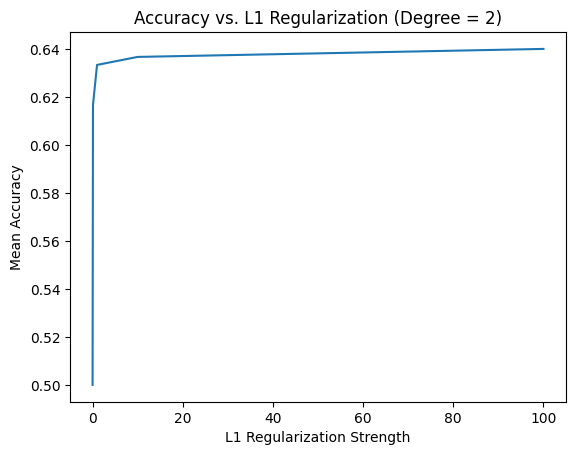

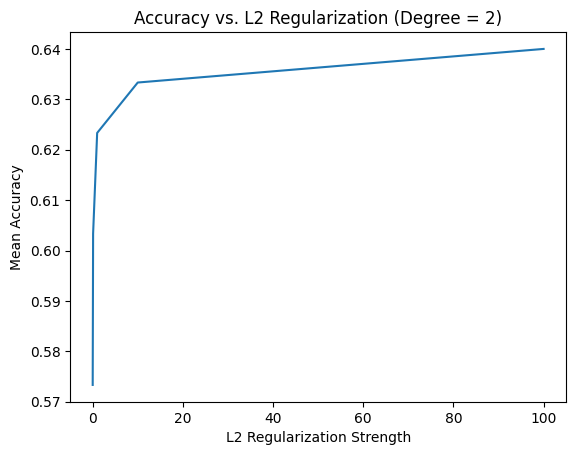


L1 regularization with C value of 0.01:
Training accuracy: 0.54
Testing accuracy: 0.4166666666666667
Accuracy: 0.53 (+/- 0.05)

L2 regularization with C value of 0.01:
Training accuracy: 0.8266666666666667
Testing accuracy: 0.4583333333333333
Accuracy: 0.59 (+/- 0.06)

L1 regularization with C value of 0.1:
Training accuracy: 0.77
Testing accuracy: 0.5166666666666667
Accuracy: 0.55 (+/- 0.10)

L2 regularization with C value of 0.1:
Training accuracy: 0.8833333333333333
Testing accuracy: 0.5083333333333333
Accuracy: 0.59 (+/- 0.08)

L1 regularization with C value of 1:
Training accuracy: 0.9166666666666666
Testing accuracy: 0.5
Accuracy: 0.59 (+/- 0.12)

L2 regularization with C value of 1:
Training accuracy: 0.9566666666666667
Testing accuracy: 0.5583333333333333
Accuracy: 0.58 (+/- 0.11)

L1 regularization with C value of 10:
Training accuracy: 0.9933333333333333
Testing accuracy: 0.5666666666666667
Accuracy: 0.60 (+/- 0.15)

L2 regularization with C value of 10:
Training accuracy: 0

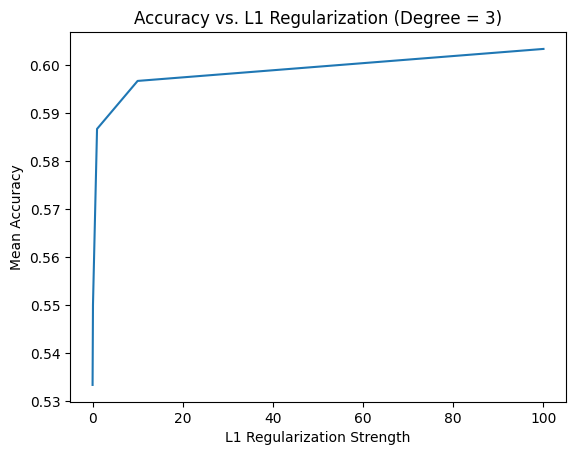

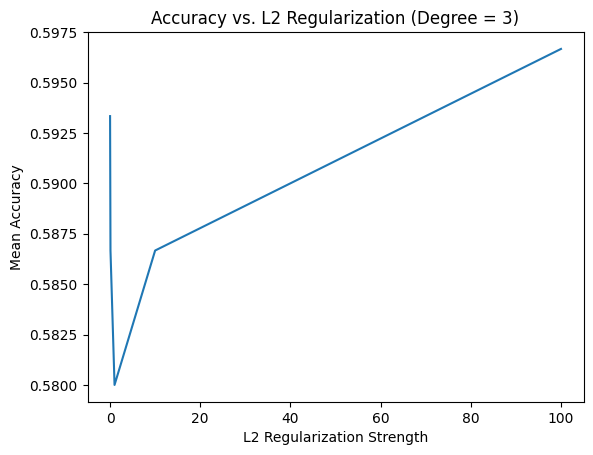


L1 regularization with C value of 0.01:
Training accuracy: 0.55
Testing accuracy: 0.5083333333333333
Accuracy: 0.51 (+/- 0.11)

L2 regularization with C value of 0.01:
Training accuracy: 0.9133333333333333
Testing accuracy: 0.4666666666666667
Accuracy: 0.59 (+/- 0.10)

L1 regularization with C value of 0.1:
Training accuracy: 0.81
Testing accuracy: 0.5
Accuracy: 0.58 (+/- 0.10)

L2 regularization with C value of 0.1:
Training accuracy: 0.9633333333333334
Testing accuracy: 0.49166666666666664
Accuracy: 0.61 (+/- 0.19)

L1 regularization with C value of 1:
Training accuracy: 0.9666666666666667
Testing accuracy: 0.4583333333333333
Accuracy: 0.63 (+/- 0.06)

L2 regularization with C value of 1:
Training accuracy: 0.9966666666666667
Testing accuracy: 0.49166666666666664


In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

degrees = [1, 2, 3, 4]
accuracy_none = []

for degree in degrees:

    print(degree)
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    print(X_train_poly.shape)

    lr_none = LogisticRegression(penalty = None, solver = 'lbfgs', max_iter= 1000)
    lr_none.fit(X_train_poly, y_train)
    print('No regularization:')
    print('Training accuracy:', accuracy_score(y_train, lr_none.predict(X_train_poly)))
    print('Testing accuracy:', accuracy_score(y_test, lr_none.predict(X_test_poly)))

    scores = cross_val_score(lr_none, X_train_poly, y_train, cv=5)

    accuracy_none.append(scores.mean())

    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    if degree == 1:
        print(classification_report(y_test, lr_none.predict(X_test_poly)))

plt.figure()
plt.plot(degrees, accuracy_none)
plt.xlabel('Polynomial Tranformations (Degree)')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. Degrees')

C_values = [0.01, 0.1, 1, 10, 100]

# Create an empty list to store the feature weights and error for each regularization strength
weights_l1 = []
weights_l2 = []
accuracy_l1 = []
accuracy_l2 = []

for degree in degrees:

    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)


    for c in C_values:

        print("")
        lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, C = c) #100
        lr_l1.fit(X_train_poly, y_train)
        print('L1 regularization with C value of {}:'.format(c))
        print('Training accuracy:', accuracy_score(y_train, lr_l1.predict(X_train_poly)))
        print('Testing accuracy:', accuracy_score(y_test, lr_l1.predict(X_test_poly)))

        l1_scores = cross_val_score(lr_l1, X_train_poly, y_train, cv=5)
        accuracy_l1.append(l1_scores.mean())
        print("Accuracy: %0.2f (+/- %0.2f)" % (l1_scores.mean(), l1_scores.std() * 2))

        weights_l1.append(lr_l1.coef_.ravel())
      
        print("")

        lr_l2 = LogisticRegression(penalty='l2', solver = 'liblinear', max_iter=1000, C = c) #100
        lr_l2.fit(X_train_poly, y_train)
        print('L2 regularization with C value of {}:'.format(c))
        print('Training accuracy:', accuracy_score(y_train, lr_l2.predict(X_train_poly)))
        print('Testing accuracy:', accuracy_score(y_test, lr_l2.predict(X_test_poly)))

        l2_scores = cross_val_score(lr_l2, X_train_poly, y_train, cv=5)
        accuracy_l2.append(l2_scores.mean())
        print("Accuracy: %0.2f (+/- %0.2f)" % (l2_scores.mean(), l2_scores.std() * 2))

        weights_l2.append(lr_l2.coef_.ravel())

    
    plt.figure()
    plt.plot(C_values, accuracy_l1)
    plt.xlabel('L1 Regularization Strength')
    plt.ylabel('Mean Accuracy')
    plt.title('Accuracy vs. L1 Regularization (Degree = {})'.format(degree))

    plt.figure()
    plt.plot(C_values, accuracy_l2)
    plt.xlabel('L2 Regularization Strength')
    plt.ylabel('Mean Accuracy')
    plt.title('Accuracy vs. L2 Regularization (Degree = {})'.format(degree))

    plt.show()
    accuracy_l1 = []
    accuracy_l2 = []

# plt.figure()
# plt.plot(C_values, weights_l1)
# plt.xlabel('L1 Regularization')
# plt.ylabel('Feature Weights')
# plt.title('Feature Weights vs. L1 Regularization')

# plt.figure()
# plt.plot(C_values, weights_l2)
# plt.xlabel('L2 Regularization')
# plt.ylabel('Feature Weights')
# plt.title('Feature Weights vs. L2 Regularization')

# plt.show()